# Tensegrity structures

### Loading libraries and files

In [12]:
#importing libraries
import numpy as np
import copy
import matplotlib.pyplot as plt
import importlib
from PIL import Image
import imageio
import io

#importing .py files and reloading
import CableTensegrityStruct as CTS
importlib.reload(CTS)
import TensegrityStruct as TS
importlib.reload(TS)
import optimization as opt
importlib.reload(opt)
import plotting
importlib.reload(plotting)
import FreeStandingStruct as FSS
importlib.reload(FSS)

<module 'FreeStandingStruct' from 'C:\\Users\\eirik\\OneDrive\\Documents\\GitHub\\Project---Optimization\\FreeStandingStruct.py'>

### Test example with only cables, fixed nodes

LIKE
BFGS used 39 iterations


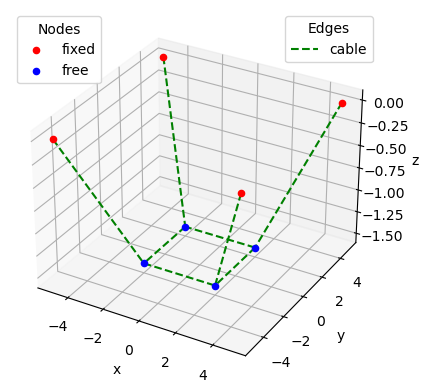

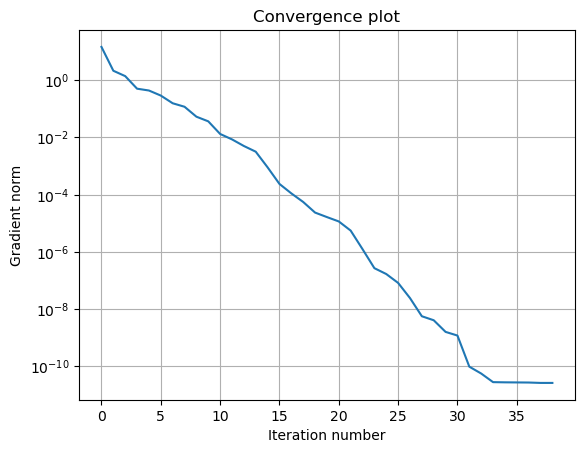

"\nimages = []\nfor fig_i in imgs:\n    # convert the Matplotlib figure to an image\n    buf = io.BytesIO()\n    fig_i.savefig(buf, format='png')\n    buf.seek(0)\n    img = Image.open(buf)\n    images.append(img)\n\n# save the sequence of images as a GIF\nimageio.mimsave('figure1.gif', images, duration=2)\n"

In [13]:
num_of_fixed_nodes = 4

nodes = np.array([[ 5,  5,    0],
                  [-5,  5,    0],
                  [-5, -5,    0],
                  [ 5, -5,    0],
                  [ 2,  2, -1.5],
                  [-2,  2, -1.5],
                  [-2, -2, -1.5],
                  [ 2, -2, -1.5]])

cables = np.array([[0, 4, 3],
                   [1, 5, 3],
                   [2, 6, 3],
                   [3, 7, 3],
                   [4, 5, 3],
                   [4, 7, 3],
                   [5, 6, 3],
                   [6, 7, 3]])

masses = np.array([[4, 1/6],
                   [5, 1/6],
                   [6, 1/6],
                   [7, 1/6]])

k = 3

struct1 = CTS.CableTensegrityStruct(num_of_fixed_nodes,nodes, masses,cables, k)

struct2 = copy.deepcopy(struct1)

#Burde være 000000000000
#print(struct2.gradient())
#fig, ax = plotting.textbox(struct2)
#plt.show()

#Test with random initialization
new_X = np.array([ -5, 8, 0, 3, -4, 3, 1, 3, -2, 3, -3, 0])

struct1.update_nodes(new_X)
#plotting.textbox(struct1)
#plt.show()

norms = opt.BFGS(struct1, return_norms=True)
plotting.plot_structure(struct1)
plt.show()

plotting.convergence_plot(norms)
plt.show()

# create a list of Matplotlib figures

# create a sequence of images
"""
images = []
for fig_i in imgs:
    # convert the Matplotlib figure to an image
    buf = io.BytesIO()
    fig_i.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf)
    images.append(img)

# save the sequence of images as a GIF
imageio.mimsave('figure1.gif', images, duration=2)
"""

### Test example with cables and bars, fixed nodes

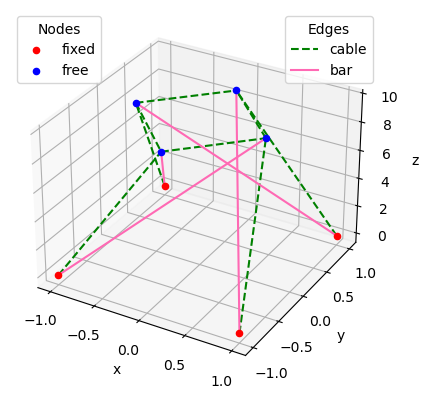

[ 2.06271080e-06  3.13847095e-09 -2.99500203e-08 -3.13847095e-09
  2.06271080e-06 -2.99500203e-08 -2.06271080e-06 -3.13847095e-09
 -2.99500203e-08  3.13847095e-09 -2.06271080e-06 -2.99500203e-08]
LIKE
BFGS used 29 iterations


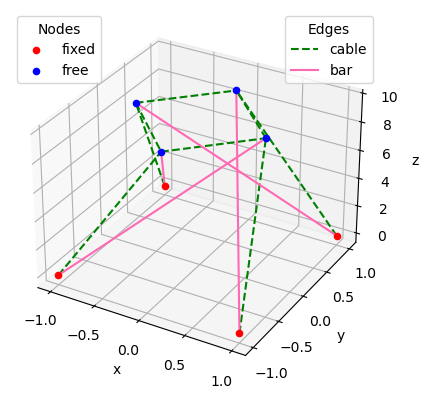

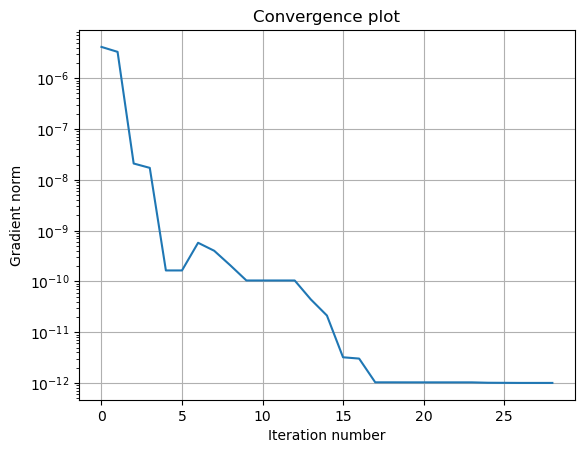

In [14]:
num_of_fixed_nodes = 4

s = 0.70970
t = 9.54287

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [-s,  0, t],
                  [ 0, -s, t],
                  [ s,  0, t],
                  [ 0,  s, t]])

cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([])

c=1
k=0.1
bar_density = 0

tensstruct = TS.TensegrityStruct(num_of_fixed_nodes, nodes, masses ,cables, bars, k, c, bar_density)
plotting.plot_structure(tensstruct)
plt.show()
print(tensstruct.gradient())

norms = opt.BFGS(tensstruct, maxiter=100, return_norms=True)

plotting.plot_structure(tensstruct)
plt.show()

plotting.convergence_plot(norms)
plt.show()

BFGS used 161 iterations


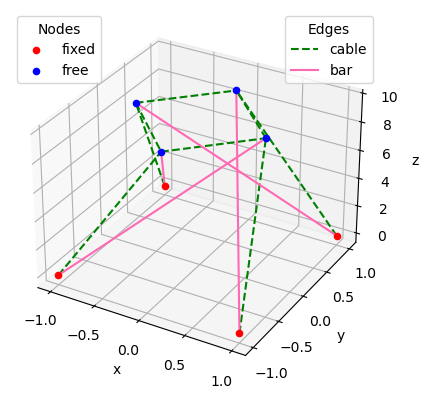

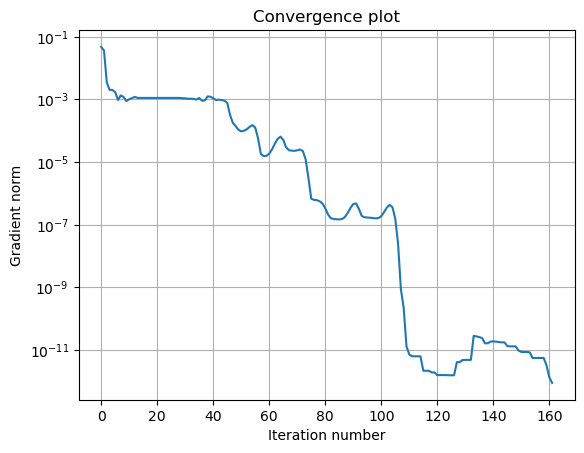

In [15]:
s = 0.70970
t = 9.54287

num_of_fixed_nodes = 4

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [-s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1, -s-0.1, t-0.1],
                  [ s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1,  s-0.1, t-0.1]])

cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([])

c=1
k=0.1
bar_density = 0

tensstruct = TS.TensegrityStruct(num_of_fixed_nodes, nodes, masses ,cables, bars, k, c, bar_density)

norms = opt.BFGS(tensstruct, maxiter=1000, return_norms=True)

plotting.plot_structure(tensstruct)
plt.show()

plotting.convergence_plot(norms)
plt.show()

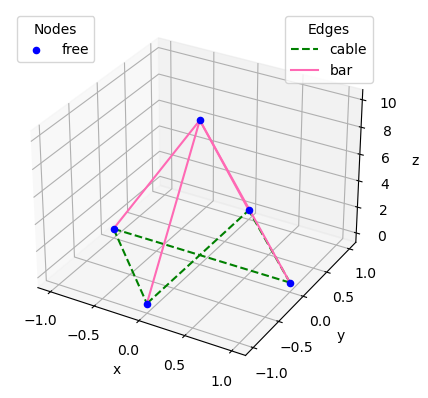

1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
LIKE
BFGS used 2 iterations
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
LIKE
BFGS used 2 iterations
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5


C:\Users\eirik\OneDrive\Documents\GitHub\Project---Optimization\TensegrityStruct.py:73: RuntimeWarning: divide by zero encountered in true_divide
  grad_node += self.c / rest_length ** 2 * (node_i - node_j) * (1 - rest_length / dist)
C:\Users\eirik\OneDrive\Documents\GitHub\Project---Optimization\TensegrityStruct.py:73: RuntimeWarning: invalid value encountered in multiply
  grad_node += self.c / rest_length ** 2 * (node_i - node_j) * (1 - rest_length / dist)
C:\Users\eirik\OneDrive\Documents\GitHub\Project---Optimization\TensegrityStruct.py:84: RuntimeWarning: divide by zero encountered in true_divide
  grad_node += self.c / rest_length ** 2 * (node_i - node_j) * (1 - rest_length / dist)
C:\Users\eirik\OneDrive\Documents\GitHub\Project---Optimization\TensegrityStruct.py:84: RuntimeWarning: invalid value encountered in multiply
  grad_node += self.c / rest_length ** 2 * (node_i - node_j) * (1 - rest_length / dist)


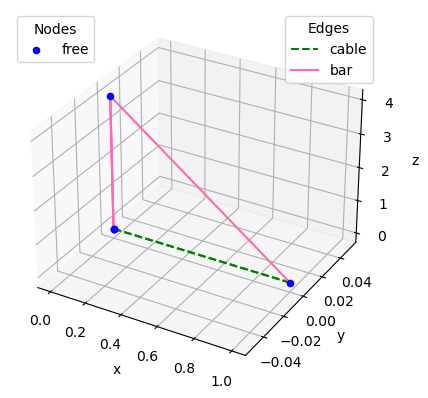

In [17]:
nodes = np.array([[ 1,  0, 0],
                  [-1,  0, 0],
                  [0, -1, 0],
                  [0 , 1, 0],
                  [0,  0, 10],
                  ])

cables = np.array([[0, 1, 1],
                   [0, 3, 1],
                   [1, 2, 1],
                   [2, 3, 1]])

bars = np.array([[0, 4, 3],
                   [1, 4, 3],
                   [2, 4, 3],
                   [3, 4, 3]])

masses = np.array([[4,0.1]])

c=1
k=0.1
bar_density = 1

new_struct = FSS.FreeStandingStruct(nodes, masses, cables, bars, k, c, bar_density, 1)
plotting.plot_structure(new_struct)
plt.show()

tolerances=np.array([1e-3, 1e-5, 1e-7, 1e-9, 1e-11])
opt.quadratic_penalty_method(new_struct, 10, tolerances, maxiter_BFGS=500)

plotting.plot_structure(new_struct)
plt.show()

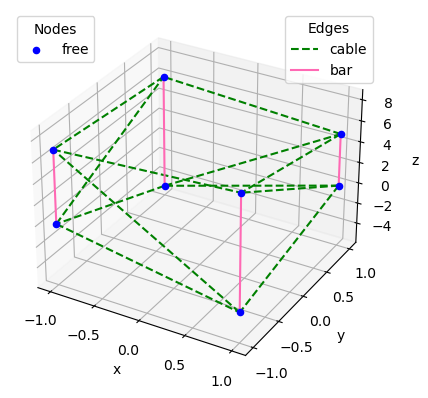

100
5e-05
5e-05
5e-05
5e-05
[ 6.73624083e-01 -1.63534481e-01  1.62860932e-01 -5.00827622e+02
 -1.44529980e-01 -1.62860932e-01  6.53997301e-01  1.45203529e-01
 -1.44529980e-01 -3.00446908e+02  1.11230829e-01  1.44529980e-01
 -3.18655869e-01 -1.10557281e-01  1.10557281e-01  1.00500000e-02
 -1.11230829e-01 -1.10557281e-01 -2.65822584e-02  1.10557281e-01
 -1.44623285e-01  2.82496830e-01]
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5

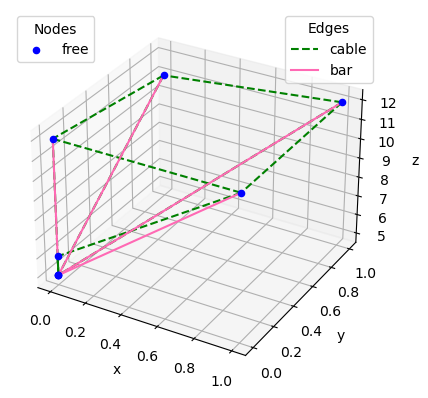

In [18]:
s = 0.70970
t = 9.54287

num_of_fixed_nodes = 4

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [-s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1, -s-0.1, t-0.1],
                  [ s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1,  s-0.1, t-0.1]])

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, -5],
                  [-1, -1, 0],
                  [ 1, -1, -3],
                  [ 1,  1, 5],
                  [-1,  1, 6],
                  [-1, -1, 7],
                  [ 1, -1, 8]])

cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1],
                   [0, 1, 1],
                   [0, 3, 1],
                   [1, 2, 1],
                   [2, 3, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([])

c=1
k=0.1
bar_density = 1e-5

new_struct2 = FSS.FreeStandingStruct(nodes, masses, cables, bars, k, c, bar_density, 100)
plotting.plot_structure(new_struct2)
plt.show()
print(new_struct2.penalty)
print(new_struct2.gradient())
tolerances=np.array([1e-3, 1e-5, 1e-7, 1e-9, 1e-11])
opt.quadratic_penalty_method(new_struct2, 10, tolerances, maxiter_BFGS=500)

plotting.plot_structure(new_struct2)
plt.show()